# HW2 Classification
- [資料前處理](#資料前處理)
    - [檢查缺失值](#檢查缺失值)
    - [檢查離群值](#檢查離群值)
- [資料分析](#資料分析)
    - [紅白酒的比例](#)
    - [變量間相關性](#)
    - [fixed acidity](#)
    - [volatile acidity](#)
    - [citric acid](#)
    - [residual sugar](#)
    - [chlorides](#)
    - [free sulfur dioxide](#)
    - [total sulfur dioxide](#)
    - [density](#)
    - [pH](#)
    - [sulphates](#)
    - [alcohol](#)
    - [quality](#)
- [建立模型](#建立模型)
- [結果與討論](#結果與討論)

## 資料前處理

In [15]:
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format

In [19]:
# 查看資料
red = pd.read_csv('dataset/winequality-red.csv', sep=';')
print(f'missing value in red wine: {red.isnull().all().all()}')
red.describe()

missing value in red wine: False


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,"1,599.000","1,599.000","1,599.000","1,599.000","1,599.000","1,599.000","1,599.000","1,599.000","1,599.000","1,599.000","1,599.000","1,599.000"
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [18]:
white = pd.read_csv('dataset/winequality-white.csv', sep=';')
print(f'missing value in white wine: {white.isnull().all().all()}')
white.describe()

missing value in white wine: False


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,"4,898.000","4,898.000","4,898.000","4,898.000","4,898.000","4,898.000","4,898.000","4,898.000","4,898.000","4,898.000","4,898.000","4,898.000"
mean,6.855,0.278,0.334,6.391,0.046,35.308,138.361,0.994,3.188,0.490,10.514,5.878
std,0.844,0.101,0.121,5.072,0.022,17.007,42.498,0.003,0.151,0.114,1.231,0.886
min,3.800,0.080,0.000,0.600,0.009,2.000,9.000,0.987,2.720,0.220,8.000,3.000
25%,6.300,0.210,0.270,1.700,0.036,23.000,108.000,0.992,3.090,0.410,9.500,5.000
50%,6.800,0.260,0.320,5.200,0.043,34.000,134.000,0.994,3.180,0.470,10.400,6.000
75%,7.300,0.320,0.390,9.900,0.050,46.000,167.000,0.996,3.280,0.550,11.400,6.000
max,14.200,1.100,1.660,65.800,0.346,289.000,440.000,1.039,3.820,1.080,14.200,9.000


In [20]:
# 添加 label、合併資料集
red['red'] = 1
white['red'] = 0
data = pd.concat([red, white], ignore_index=True)

X = data[data.columns[:-1]]
y = data['red']
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5,1
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5,1
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5,1
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6,1
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.200,0.210,0.290,1.600,0.039,24.000,92.000,0.991,3.270,0.500,11.200,6,0
6493,6.600,0.320,0.360,8.000,0.047,57.000,168.000,0.995,3.150,0.460,9.600,5,0
6494,6.500,0.240,0.190,1.200,0.041,30.000,111.000,0.993,2.990,0.460,9.400,6,0
6495,5.500,0.290,0.300,1.100,0.022,20.000,110.000,0.989,3.340,0.380,12.800,7,0


In [21]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
count,"6,497.000","6,497.000","6,497.000","6,497.000","6,497.000","6,497.000","6,497.000","6,497.000","6,497.000","6,497.000","6,497.000","6,497.000","6,497.000"
mean,7.215,0.340,0.319,5.443,0.056,30.525,115.745,0.995,3.219,0.531,10.492,5.818,0.246
std,1.296,0.165,0.145,4.758,0.035,17.749,56.522,0.003,0.161,0.149,1.193,0.873,0.431
min,3.800,0.080,0.000,0.600,0.009,1.000,6.000,0.987,2.720,0.220,8.000,3.000,0.000
25%,6.400,0.230,0.250,1.800,0.038,17.000,77.000,0.992,3.110,0.430,9.500,5.000,0.000
50%,7.000,0.290,0.310,3.000,0.047,29.000,118.000,0.995,3.210,0.510,10.300,6.000,0.000
75%,7.700,0.400,0.390,8.100,0.065,41.000,156.000,0.997,3.320,0.600,11.300,6.000,0.000
max,15.900,1.580,1.660,65.800,0.611,289.000,440.000,1.039,4.010,2.000,14.900,9.000,1.000


In [222]:
def preprocess(split=True):
    import pandas as pd
    from sklearn.model_selection import train_test_split
    
    red = pd.read_csv('dataset/winequality-red.csv', sep=';')
    white = pd.read_csv('dataset/winequality-white.csv', sep=';')
    
    red['red'] = 1
    white['red'] = 0
    data = pd.concat([red, white], ignore_index=True)

    X = data[data.columns[:-1]]
    y = data['red']
    if not split:
        return X, y
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

## 資料分析

Percentage of red wine: 24.611359088810218 %


c:\users\ting\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


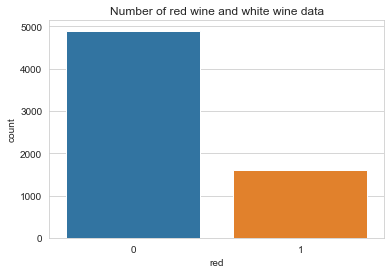

In [106]:
# 紅酒和白酒的比例
import seaborn as sns
sns.set_style('whitegrid')
plt.title('Number of red wine and white wine data')
sns.countplot(y)
print(f'Percentage of red wine: {y.sum() / y.count() * 100} %')

<AxesSubplot:title={'center':'Correlation of Features'}>

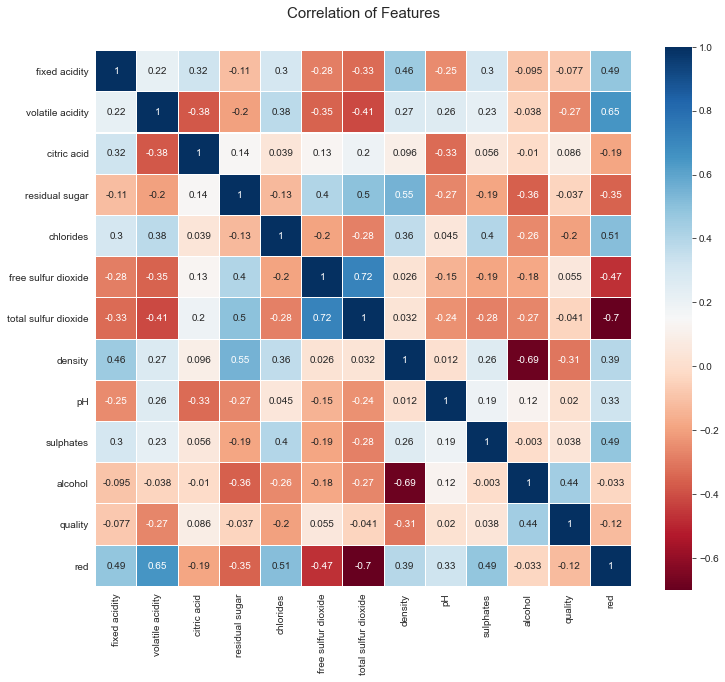

In [107]:
# 變量之間相關性
colormap = plt.cm.RdBu
plt.figure(figsize=(12,10))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [108]:
# 特徵縮放
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [221]:
def estimate(model, X_test, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
    from sklearn.metrics import accuracy_score
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'accuracy: {acc}')
    
    fig, ax = plt.subplots(dpi=100.0)
    ax.grid(False)
    plot_confusion_matrix(model, X_test, y_test,
                          display_labels=('White', 'Red'),
                          cmap=plt.cm.Blues,
                          normalize=None,
                          ax=ax,)
    plt.show()
    
    fig, ax = plt.subplots(dpi=100.0)
    ax.grid(False)
    plot_confusion_matrix(model, X_test, y_test,
                          display_labels=('White', 'Red'),
                          cmap=plt.cm.Blues,
                          normalize='all',
                          ax=ax,)
    plt.show()

c:\users\ting\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.9338461538461539


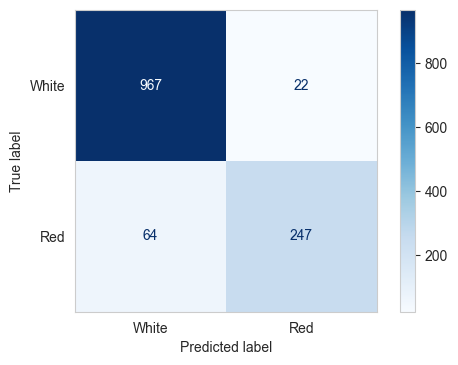

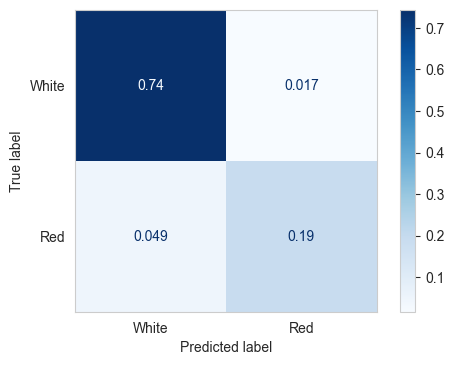

In [223]:
X_train, X_test, y_train, y_test = preprocess()

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

estimate(model, X_test, y_test)

In [105]:
# 分割訓練集和測試集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5372,5.0,0.61,0.12,1.3,0.009,65.0,100.0,0.98740,3.26,0.37,13.5,5
1790,6.8,0.28,0.40,22.0,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5
5879,5.7,0.22,0.20,16.0,0.044,41.0,113.0,0.99862,3.22,0.46,8.9,6
1065,7.7,0.61,0.18,2.4,0.083,6.0,20.0,0.99630,3.29,0.60,10.2,6
852,8.0,0.42,0.32,2.5,0.080,26.0,122.0,0.99801,3.22,1.07,9.7,5


## Logitic Regression

In [109]:
# Logistic regression training
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
print(f'{classifier.coef_}')
print(f'{classifier.intercept_}')

[[-0.15246986  1.06168717 -0.2690699  -2.88381352  0.78934819  0.68815897
  -2.68501005  4.6902527   0.09273367  0.450938    1.84465048  0.33746835]]
[-3.37289242]


In [118]:
# Logistic regression prediction and estimation
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
result = confusion_matrix(y_test, y_pred)
print(result)

pd.crosstab(y_pred, y_test)

[[984   5]
 [  3 308]]


red,0,1
row_0,,
0,984,3
1,5,308


In [157]:
def model_estimate(test, pred):
    from matplotlib import pyplot as plt
    from sklearn.metrics import confusion_matrix
    result = confusion_matrix(test, pred)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.grid(False)
    cax = ax.matshow(result, interpolation='nearest', cmap=plt.cm.Blues, alpha=0.8)
    fig.colorbar(cax)

    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted White', 'Predicted Red'))
    plt.xticks(fontsize=16)

    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual White', 'Actual Red'))
    plt.yticks(fontsize=16)

    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            ax.text(x=j, y=i, s=result[i, j], va='center', ha='center', size=20)

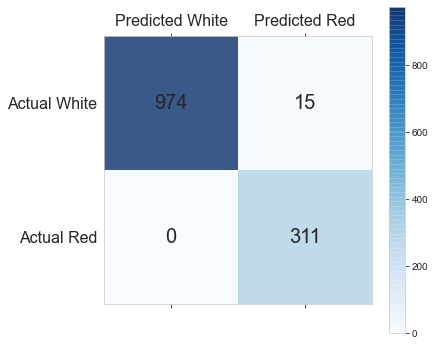

In [176]:
model_estimate(y_test, y_pred)

In [112]:
# Logistic regression result visualization
classifier.score(X_test, y_test)

0.9938461538461538

## Linear Discriminant Analysis

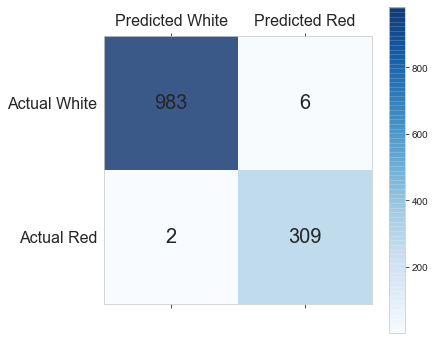

In [177]:
X, y, X_train, X_test, y_train, y_test = data_preprocessing()

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_estimate(y_test, y_pred)

## Quadratic Discriminant Analysis

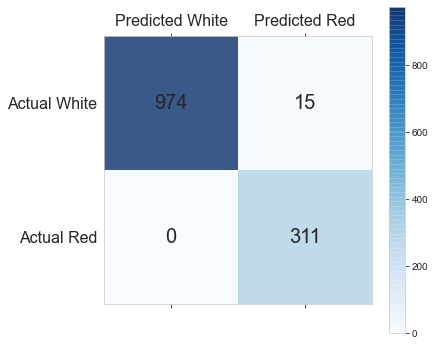

In [178]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_estimate(y_test, y_pred)

## K-Nearesr Neighbors

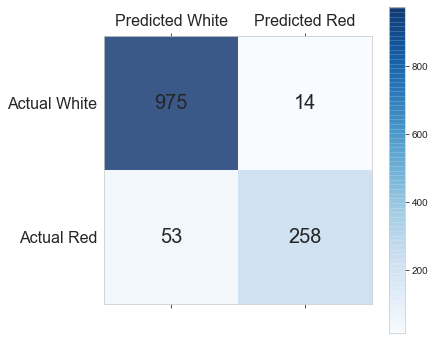

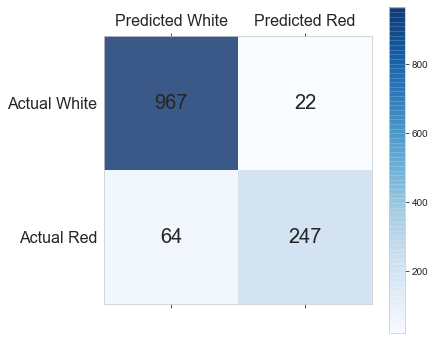

In [196]:
X, y, X_train, X_test, y_train, y_test = data_preprocessing()

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_estimate(y_test, y_pred)

model = KNeighborsClassifier(n_neighbors=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_estimate(y_test, y_pred)

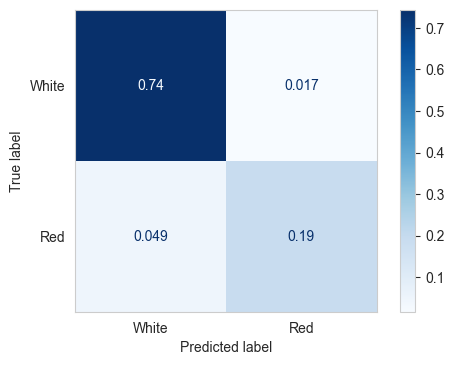

In [220]:
X, y, X_train, X_test, y_train, y_test = data_preprocessing()
model = KNeighborsClassifier(n_neighbors=100)
model.fit(X_train, y_train)


def estimate(model, X_test, y_test, normalize=True):
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix

    fig, ax = plt.subplots(dpi=100.0)
    ax.grid(False)
    plot_confusion_matrix(model, X_test, y_test,
                          display_labels=('White', 'Red'),
                          cmap=plt.cm.Blues,
                          normalize='all' if normalize else None,
                          ax=ax,)
    plt.show()

estimate(model, X_test, y_test)